# Multinomial logistic decoders

Last week we ended with a PyTorch implementation of a multifeature logistic classifier. We were able to have it determine whether a thumb movement had been initiated based on the profile of spectral changes across multiple ECoG electrodes lying over motor cortex.
Multiclass data
Softmax
SKlearn fit
Pytorch implementation
Using GPU resources
Confusion matrix
Continuous data, time series
Viterbi/HMM



In [1]:
import sys
from itertools import product
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, StratifiedKFold
from source.helpers import zscore
from matplotlib import animation
from IPython.display import HTML
import torch
from torch.utils.data import Dataset, DataLoader

![spectral profiles](./images/SpectralProfiles.png)

In [2]:
flex_events = np.load('../Week7/data/flex.npy')
locs = np.load('../Week7/data/locs.npy')
fs = np.load('../Week7/data/fs.npy')
Y_all = np.load('../Week7/data/Y_all.npy')
freqs = np.load('../Week7/data/freqs.npy')
t = np.load('../Week7/data/t.npy')
flex_onwins = np.load('../Week8/data/flex_spec_onwin.npy')

In [10]:
t_flex_events = np.arange(len(flex_events))/fs

(10.0, 100.0)

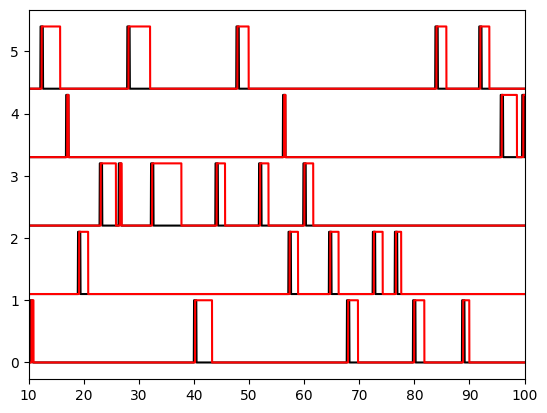

In [15]:
plt.plot(t,(flex_onwins>0)+np.arange(5)*1.1, 'k')
plt.plot(t_flex_events,flex_events+np.arange(5)*1.1, 'r')
plt.xlim(10, 100)

In [ ]:
# list mps devices
if torch.cuda.is_available(): # PC with GPU
    print('CUDA is available')
    device = torch.device('cuda')
elif torch.backends.mps.is_available(): # use neural engine on Mac
    print('MPS is available')
    device = torch.device('mps')
else:
    print('No GPU available, using CPU')
    device = torch.device('cpu')
    